In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# 1. Connect to the "Data Warehouse" we built in Phase 3
# Note: We use .. because the notebook is inside a subfolder
db_path = "sqlite:///../railways.db" 
engine = create_engine(db_path)

print("✅ Connected to Database!")

✅ Connected to Database!


C:\Users\Chinmay\AppData\Local\Temp\ipykernel_25720\316485434.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='train_count', y='station_code', data=df_busiest, palette='viridis')


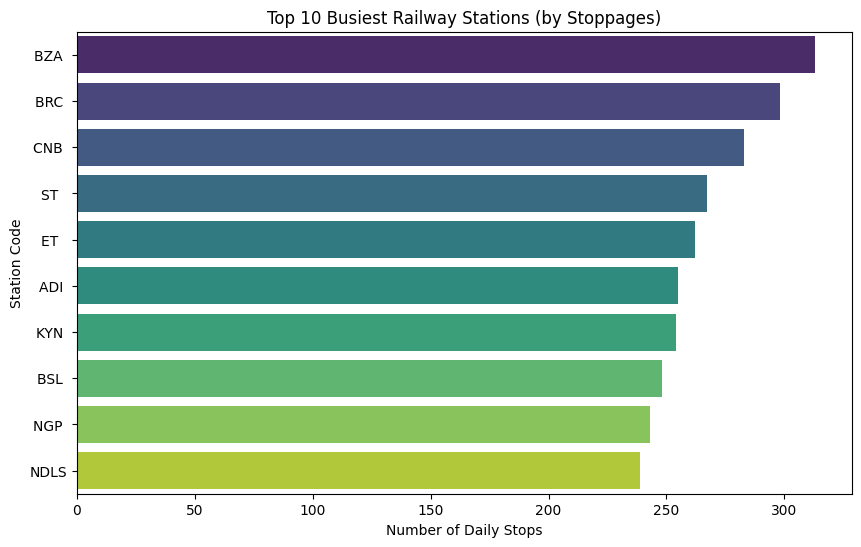

In [2]:
# SQL Query: Count how many times each station appears in schedules
query_busiest = """
SELECT station_code, COUNT(*) as train_count 
FROM train_schedules 
GROUP BY station_code 
ORDER BY train_count DESC 
LIMIT 10;
"""

df_busiest = pd.read_sql(query_busiest, engine)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='train_count', y='station_code', data=df_busiest, palette='viridis')
plt.title('Top 10 Busiest Railway Stations (by Stoppages)')
plt.xlabel('Number of Daily Stops')
plt.ylabel('Station Code')
plt.show()

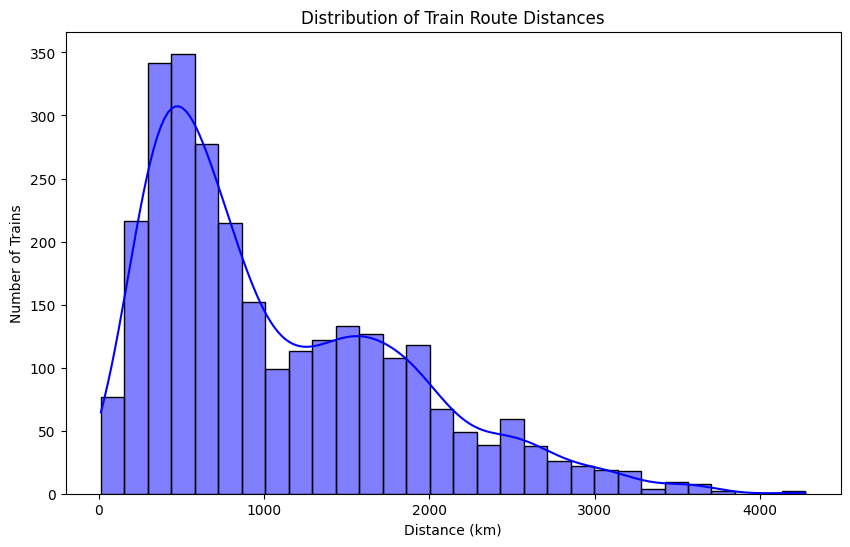

Longest Route: 4273.0 km
Average Route: 1075.23 km


In [3]:
# SQL Query: Get the maximum distance for every train
query_distance = """
SELECT train_no, MAX(distance) as total_distance 
FROM train_schedules 
GROUP BY train_no;
"""

df_distance = pd.read_sql(query_distance, engine)

# Visualization: Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_distance['total_distance'], bins=30, kde=True, color='blue')
plt.title('Distribution of Train Route Distances')
plt.xlabel('Distance (km)')
plt.ylabel('Number of Trains')
plt.show()

print(f"Longest Route: {df_distance['total_distance'].max()} km")
print(f"Average Route: {df_distance['total_distance'].mean():.2f} km")

C:\Users\Chinmay\AppData\Local\Temp\ipykernel_25720\1077030093.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='zone', y='station_count', data=df_zones, palette='magma')


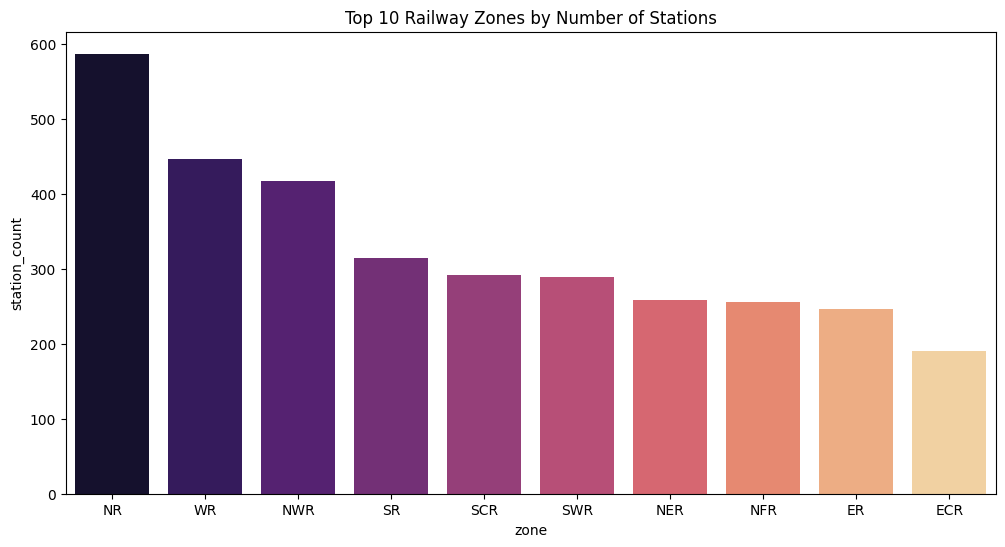

In [4]:
# SQL Query: Join Stations table to find Zone distribution
query_zones = """
SELECT zone, COUNT(*) as station_count 
FROM stations 
WHERE zone != 'Unknown'
GROUP BY zone 
ORDER BY station_count DESC 
LIMIT 10;
"""

df_zones = pd.read_sql(query_zones, engine)

# Visualization: Pie Chart or Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x='zone', y='station_count', data=df_zones, palette='magma')
plt.title('Top 10 Railway Zones by Number of Stations')
plt.show()